In [2]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 902.2 kB/s eta 0:00:00


In [3]:

import torch
from transformers import AutoTokenizer, AutoModel, BertConfig

tokenizer = AutoTokenizer.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)
config = BertConfig.from_pretrained("zhihan1996/DNABERT-2-117M")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/168k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

In [4]:
model = AutoModel.from_config(config)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [6]:
import pandas as pd
df = pd.read_csv("/content/data.csv")

In [20]:
dna=df["sequenza"][0]
dna

'TTTCATGCATTGTATGCAGAAAGTGGAGAGTGGATATTTTGAAAAGTGCTGGTTGAGATATTCCCAATTTTTTCCTACTAGGCTATGGCCAGCAATTTAATTAGAGACAAGATCTCCAATTAGCCAAAAGAAAGTCAGATGACAAAGTATTGCTATACTGAAAAGATACCTTGAATATAGGAAGTCCCCAAGGAGCCCTGATGGGCAGCAAGGAGGCAGGAGGAAGAACCAGGCACATGCTGAAGGCCAAGGCAGTGCAGGGAGCCAGGCTGTAACAGCCGAGTGAAAGGAACTAGCAAAGCACACCAGCAGGAGAGGAAGATTCCATTTGAACCCAAGCTATGTGACCCATCCAAGTCCTAAAGCTCATCGATGTTATGCACCTTCTCAGCATACCCAGGTGCCAAGCACAGGGCAGGTAAGGAGCGTCTTCAATGACATATTCTGATTTAATGAAGCAAGCACTGAACCAGGAGCCAAGAGACCCAGATTCAATCCCTCTTCCACTTAGAAGCTCTGTAATATGGAGCAAGTAAATTCCTTCAGTGCCCTCACTTGTAAAGCACTGATAATGTTTGCTGTCTTTCACAGGTAGTATG'

In [22]:
s=tokenizer(dna, return_tensors='pt')["input_ids"]
s.shape

torch.Size([1, 121])

In [8]:
def encode_sentence(sent):
  inputs = tokenizer(sent, return_tensors = 'pt')["input_ids"]
  hidden_states = model(inputs)[0]
  return hidden_states

In [9]:
mini_df = df.head(100)

In [10]:
mini_df

,sequenza,id
0,TTTCATGCATTGTATGCAGAAAGTGGAGAGTGGATATTTTGAAAAG...,0
1,GGATGGTCTCGATCTCCTGACCTCGTGATCTGCCACCTCGGCTTCC...,1
2,GCGTGGGAGCATCCTGGCTCCCGGGTTCGTGGTGGTGACTTGGCTG...,1
3,TTTCGGACATACTTATACCAAAAAACATAAAATAAAATACTTTATA...,1
4,TGGGATTTTCACACACTTGCTATTTATGAGCCAGGAATAACGACAG...,1
...,...,...
95,CAATGGCCCAGTCATCTCAAAAGAACTTTGCTGTGAGAGTGGTCAT...,0
96,GCAGATAGAGGAGCTGGGAAGGGCCTGAGGCTGCAGCCCTAGACCT...,0
97,TTTAGAGGGATTCAGCACTGGTGAGAAAGTTTGGCTAATCTAAGCA...,0
98,TAAATACTTCAGCCTATAGCCCTTAACAGATACACGCGACGAGATT...,1


from matplotlib import pyplot as plt
mini_df[' id'].plot(kind='hist', bins=20, title=' id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mini_df[' id'].plot(kind='line', figsize=(8, 4), title=' id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
data_inputs = pd.DataFrame()
data_inputs = mini_df['sequenza'].apply(encode_sentence)

In [13]:
data_labels = mini_df[" id"]

In [14]:
data_inputs[0].shape

torch.Size([1, 121, 768])

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_inputs, data_labels, test_size=1/3)

In [ ]:
import tensorflow as tf

In [ ]:
data_X_Train = [tf.convert_to_tensor(tensor.detach().numpy(), dtype=tf.float32) for tensor in X_train]
data_X_Test = [tf.convert_to_tensor(tensor.detach().numpy(), dtype=tf.float32) for tensor in X_test]



In [ ]:
min = sum(tensor.shape[1] for tensor in data_inputs)/100
print(min)

123.9


In [ ]:
# Determina la lunghezza minima lungo l'asse 1 tra i tensori
min_length_dim1 = min(tensor.shape[1] for tensor in data_X_Train)

# Regola le dimensioni dei tensori per farle corrispondere lungo l'asse 1
data_tf_adjusted = [tensor[:, :100, :] for tensor in data_X_Train]

# Concatena i tensori lungo l'asse 0
concatenated_data_X_Train = tf.concat(data_tf_adjusted, axis=0)

In [ ]:
concatenated_data_X_Train.shape

TensorShape([66, 100, 768])

In [ ]:
# Determina la lunghezza minima lungo l'asse 1 tra i tensori
min_length_dim1 = min(tensor.shape[1] for tensor in data_X_Test)

# Regola le dimensioni dei tensori per farle corrispondere lungo l'asse 1
data_tf_adjusted = [tensor[:, :100, :] for tensor in data_X_Test]

# Concatena i tensori lungo l'asse 0
concatenated_data_X_Test = tf.concat(data_tf_adjusted, axis=0)

In [ ]:
concatenated_data_X_Test.shape

TensorShape([34, 100, 768])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definizione dell'architettura della CNN
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(100, 768)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),  # Riduce le dimensioni per passare a un classificatore
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output binario
])

# Compilazione del modello
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizzazione dell'architettura del modello
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            73760     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 global_average_pooling1d (  (None, 128)               0

In [ ]:
history = model.fit(concatenated_data_X_Train, Y_train, epochs=30, batch_size=10, validation_data=(concatenated_data_X_Test, Y_test))

# Valutazione del modello
loss, accuracy = model.evaluate(concatenated_data_X_Test, Y_test)
print("Loss sul set di validazione:", loss)
print("Accuracy sul set di validazione:", accuracy)


Epoch 1/30
7/7 [==============================] - 2s 85ms/step - loss: 0.7330 - accuracy: 0.5152 - val_loss: 0.8948 - val_accuracy: 0.4706
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.7414 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.5294
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.7156 - accuracy: 0.3939 - val_loss: 0.6943 - val_accuracy: 0.4706
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.7122 - accuracy: 0.4394 - val_loss: 0.6906 - val_accuracy: 0.5294
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.7181 - accuracy: 0.4848 - val_loss: 0.6951 - val_accuracy: 0.5294
Epoch 6/30
7/7 [==============================] - 0s 22ms/step - loss: 0.6969 - accuracy: 0.4545 - val_loss: 0.7000 - val_accuracy: 0.4706
Epoch 7/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6974 - accuracy: 0.5152 - val_loss: 0.6943 - val_accuracy: 0.4706
Epoch 8/30
7/7 [===========

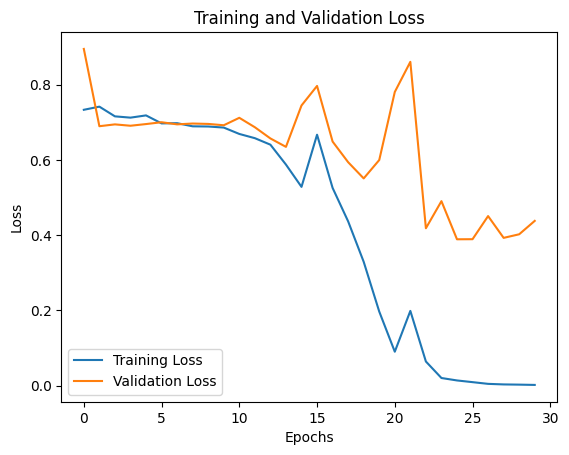

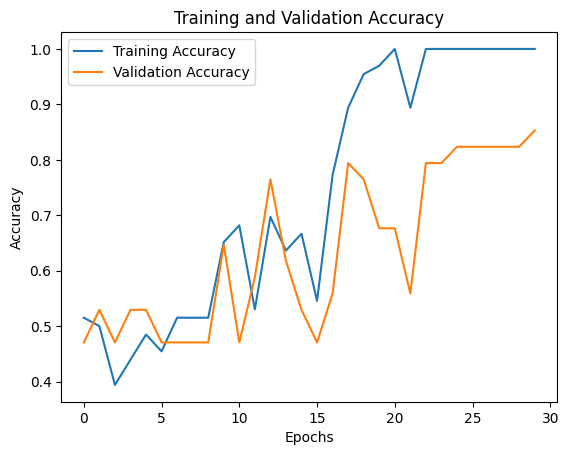

In [ ]:
import matplotlib.pyplot as plt

# Plot della loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot dell'accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
df

,sequenza,id
0,TTTCATGCATTGTATGCAGAAAGTGGAGAGTGGATATTTTGAAAAG...,0
1,GGATGGTCTCGATCTCCTGACCTCGTGATCTGCCACCTCGGCTTCC...,1
2,GCGTGGGAGCATCCTGGCTCCCGGGTTCGTGGTGGTGACTTGGCTG...,1
3,TTTCGGACATACTTATACCAAAAAACATAAAATAAAATACTTTATA...,1
4,TGGGATTTTCACACACTTGCTATTTATGAGCCAGGAATAACGACAG...,1
...,...,...
30603,TGGGCTTGAGGTTTCCAGGAGAGTCTGCGGTGTAGGGAGCGCTCTG...,1
30604,TAGGTAGGAAAATGGTTACTACAGTGAAGAAAATTAACATATCTAT...,0
30605,CCTTGGGCTGGGACAGGCCAGACGTTGGTAACACATCGCCAACCAG...,1
30606,ACTCGCAGGAAAGAACTGCTCAGCAGGAGCCCAAGCACCGGTGTTG...,0
